In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv("train.csv")  
df.head()


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
print(df.shape)
print(df.info())
print(df['price_range'].value_counts())


(2000, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 1

In [5]:
X = df.drop('price_range', axis=1)
y = df['price_range']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [6]:
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=12,
    random_state=42
)

rf.fit(X_train, y_train)


,n_estimators,300
,criterion,'gini'
,max_depth,12
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [7]:
y_pred = rf.predict(X_test)


In [8]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.885


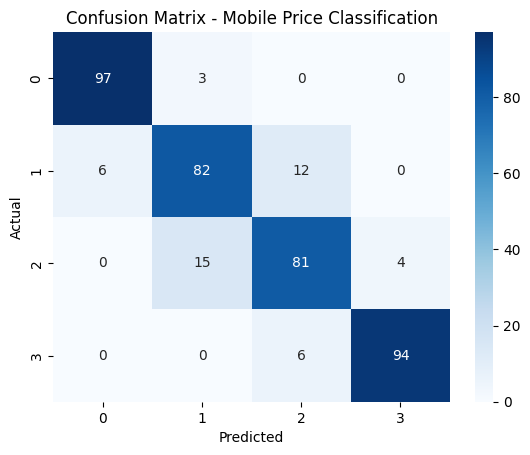

In [9]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Mobile Price Classification")
plt.show()


In [10]:
print(classification_report(y_test, y_pred))
cv_scores = cross_val_score(
    rf, X, y, cv=5, scoring='accuracy'
)

print("Cross-validation scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())


              precision    recall  f1-score   support

           0       0.94      0.97      0.96       100
           1       0.82      0.82      0.82       100
           2       0.82      0.81      0.81       100
           3       0.96      0.94      0.95       100

    accuracy                           0.89       400
   macro avg       0.88      0.89      0.88       400
weighted avg       0.88      0.89      0.88       400

Cross-validation scores: [0.88   0.8775 0.8925 0.875  0.8625]
Mean CV Accuracy: 0.8775000000000001


ram              0.496946
battery_power    0.073802
px_width         0.056554
px_height        0.054384
mobile_wt        0.039168
int_memory       0.034250
talk_time        0.029853
pc               0.028981
sc_w             0.026807
clock_speed      0.026604
dtype: float64


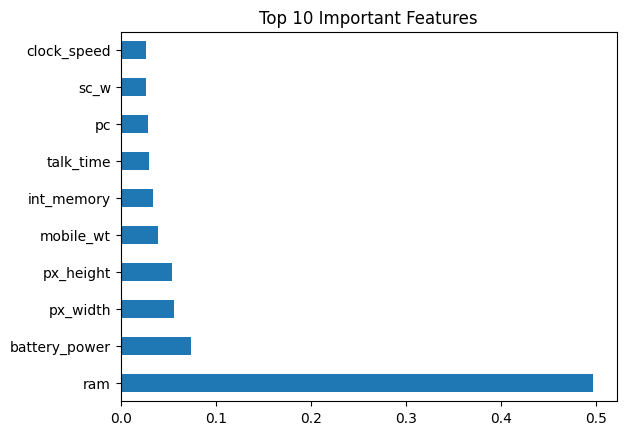

In [11]:
importances = pd.Series(
    rf.feature_importances_, index=X.columns
).sort_values(ascending=False)

print(importances.head(10))

importances.head(10).plot(kind='barh')
plt.title("Top 10 Important Features")
plt.show()
